In [7]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

In [9]:
import flux_recoil_spec as frs
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.34198906017017033, intercept=-12.883178144228602, rvalue=-0.995335235616547, pvalue=2.8473572672920914e-06, stderr=0.014824519476613411, intercept_stderr=0.062738752622659)
0.009998654133395216 0.01


In [10]:
Er= np.geomspace(0.1e-3, 100e-3, 100)
#print(Er)
drde,dsig=frs.dRdErNE(Er,E,F,N=1,Z=14,A=28,eta=14)
print(Er)

[ 0.04601711  0.04934263  0.05290849  0.05673204  0.0608319   0.06522806
  0.06994191  0.07499642  0.0804162   0.08622765  0.09245909  0.09914085
  0.10630548  0.11398788  0.12222547  0.13105837  0.14052959  0.15068527
  0.16157488  0.17325145  0.18577185  0.19919706  0.21359248  0.22902822
  0.24557945  0.26332679  0.28235669  0.30276182  0.32464158  0.34810252
  0.37325893  0.40023331  0.42915706  0.46017105  0.49342633  0.52908489
  0.56732038  0.60831905  0.65228058  0.69941908  0.74996416  0.80416198
  0.86227653  0.92459086  0.99140848  1.06305481  1.13987883  1.22225471
  1.31058366  1.4052959   1.50685273  1.61574879  1.73251447  1.85771848
  1.99197063  2.13592481  2.29028217  2.4557945   2.63326794  2.8235669
  3.02761824  3.2464158   3.48102525  3.73258927  4.00233313  4.29157063
  4.60171051  4.93426335  5.29084885  5.6732038   6.08319048  6.52280576
  6.99419081  7.49964155  8.04161981  8.62276534  9.24590863  9.91408476
 10.63054813 11.39878831 12.22254708 13.1058366  14.

In [47]:
def cross_section(amplitude, energy, shell_energies, electron_number):
    cross_section = 0
    total_e = np.sum(electron_number)  # Total electron number
    
    # Case where energy is below the first shell energy
    if energy < shell_energies[0]:
        cross_section = 0
    # Case where energy is above the last shell energy
    elif energy >= shell_energies[-1]:
        cross_section = 1
    else:
        # Loop through shell energies and calculate cross-section
        for i in range(len(shell_energies) - 1):
            if shell_energies[i] <= energy < shell_energies[i + 1]:
                cross_section = np.sum(electron_number[:i + 1]) / total_e
                break

    # Multiply by amplitude
    cross_section *= amplitude
    return cross_section

def mod_and_plot(Er, dRdE, shell_energies, electron_number, plot=False, xmin = 0, xmax = 20, ymin = 1e-3, ymax = 1e3):
    modified_dRdE = []
    fig, ax = plt.subplots(1, 1, figsize = (9, 6))
    for i in range(len(dRdE)):
        cross_sect = cross_section(dRdE[i], Er[i]*10000, shell_energies, electron_number)
        modified_dRdE.append(cross_sect)
    if plot:
        ax.plot(Er*1000, drde, 'r--', label='Unmodified')
        ax.plot(Er*1000, modified_dRdE, label='Modified Low Energy Spectrum')
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.set_yscale('log')
        ax.set_xlabel(r'recoil energy [keV]')
        ax.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
        ax.yaxis.grid(True,which='minor',linestyle='--')
        ax.legend(loc='lower left',prop={'size':15})
        ax.yaxis.grid(True,which='minor',linestyle='--')
        ax.grid(True)
    else:
        return modified_dRdE

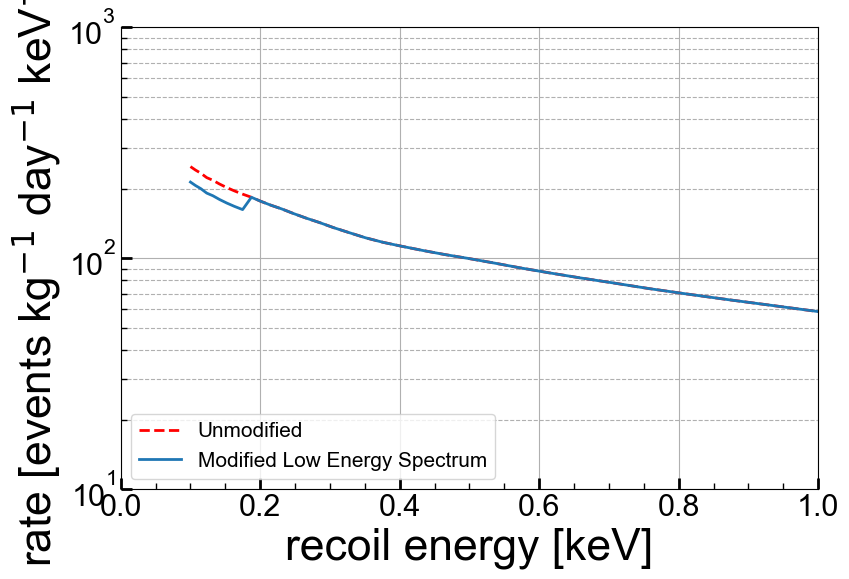

In [51]:
Er= np.geomspace(0.1e-3, 100e-3, 100)

shell_energies = np.array([1.12, 99.2, 150, 1839])/1000
electron_number = np.array([4, 6, 2, 2])

mod_and_plot(Er, drde, shell_energies, electron_number, plot=True, xmin=0, xmax=1, ymin=1e1, ymax=1e3)

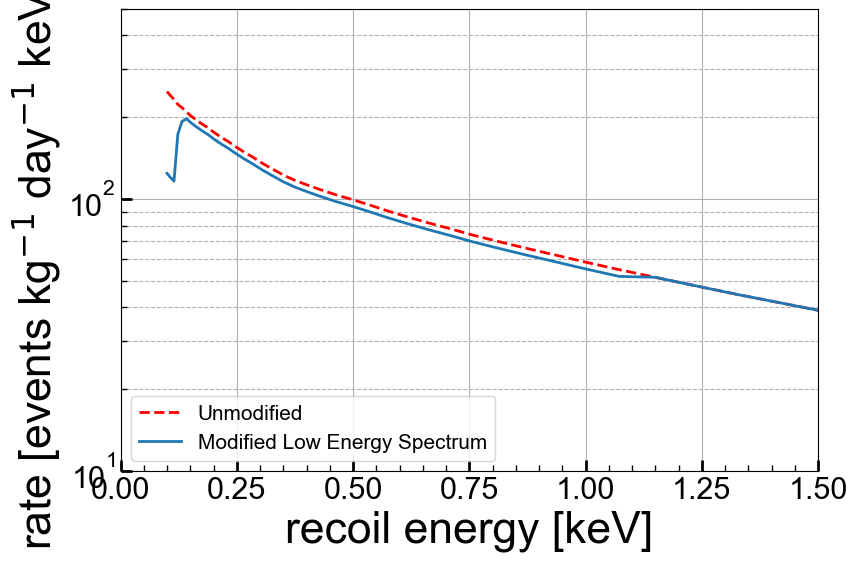

In [39]:
Er= np.geomspace(0.1e-3, 100e-3, 100)
shell_energies_Ge = np.array([29.2, 29.8, 120.8, 124.8, 180.1, 1217, 1248.1, 1414.6, 11103])/1000
electron_number_Ge = np.array([2, 2, 6, 2, 6, 10, 4, 2, 2])
mod_and_plot(Er, drde, shell_energies_Ge, electron_number_Ge, plot=True, xmin=0, xmax=1.5, ymin=1e1, ymax=5e2)